In [2]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

pd.set_option('display.max_rows', 200)

filepath = os.path.join('Resources', 'countries.csv')
eco_csv = pd.read_csv(filepath, header=0)

# Countries Ranked by Total Ecological Footprint

In [22]:
# New dataframe with only Footprint and Biocapacity Reserve/Deficit
my_df = pd.DataFrame(eco_csv.iloc[:,[0,1,2,17,5,6,7,8,9,10,11,12,13,14,15,16]])

new_col = my_df['Biocapacity Deficit or Reserve']/my_df['Total Biocapacity'] * 100
my_df.insert(loc=4, column='Bio Deficit or Reserve %', value=new_col)
my_df['Bio Deficit or Reserve %'] = my_df['Bio Deficit or Reserve %'].map('{:.1f}%'.format)

new_col2 = my_df['Total Ecological Footprint']/my_df['Population (millions)']
my_df.insert(loc=11, column='Footprint per Mil Persons', value=new_col2)

eco_sort = my_df.sort_values('Total Ecological Footprint')
eco_sort.reset_index(inplace=True, drop=True)
eco_sort

,Country,Region,Population (millions),Biocapacity Deficit or Reserve,Bio Deficit or Reserve %,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Footprint per Mil Persons,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity
0,Eritrea,Africa,6.130,0.88,67.7%,0.10,0.18,0.06,0.03,0.01,0.42,0.068515,0.07,0.18,0.09,0.93,0.02,1.30
1,Timor-Leste,Asia-Pacific,1.110,1.30,73.0%,0.25,0.07,0.04,0.06,0.02,0.48,0.432432,0.21,0.06,0.52,0.94,0.04,1.78
2,Haiti,Latin America,10.170,-0.34,-125.9%,0.27,0.04,0.10,0.15,0.01,0.61,0.059980,0.18,0.03,0.01,0.01,0.03,0.27
3,Bangladesh,Asia-Pacific,154.700,-0.35,-92.1%,0.29,0.00,0.08,0.26,0.02,0.72,0.004654,0.25,0.00,0.00,0.05,0.07,0.38
4,Afghanistan,Middle East/Central Asia,29.820,-0.30,-60.0%,0.30,0.20,0.08,0.18,0.00,0.79,0.026492,0.24,0.20,0.02,0.00,0.04,0.50
5,Pakistan,Asia-Pacific,179.160,-0.44,-125.7%,0.27,0.01,0.08,0.38,0.02,0.79,0.004409,0.26,0.00,0.01,0.04,0.03,0.35
6,Burundi,Africa,9.850,-0.48,-150.0%,0.21,0.07,0.45,0.04,0.00,0.80,0.081218,0.20,0.07,0.01,0.01,0.03,0.32
7,Malawi,Africa,15.910,-0.15,-22.7%,0.43,0.05,0.20,0.07,0.01,0.81,0.050911,0.45,0.07,0.02,0.06,0.05,0.66
8,"Congo, Democratic Republic of",Africa,65.700,2.25,73.3%,0.15,0.01,0.51,0.07,0.01,0.82,0.012481,0.13,0.32,2.52,0.05,0.05,3.07
9,Rwanda,Africa,11.460,-0.32,-59.3%,0.43,0.05,0.25,0.07,0.01,0.87,0.075916,0.42,0.05,0.01,0.01,0.05,0.54


## How the U.S. ranks

In [24]:
index_us = eco_sort.loc[eco_sort["Country"] == "United States of America",:]
index_us

,Country,Region,Population (millions),Biocapacity Deficit or Reserve,Bio Deficit or Reserve %,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Footprint per Mil Persons,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity
183,United States of America,North America,317.5,-4.46,-118.6%,1.13,0.3,0.67,5.9,0.12,8.22,0.02589,1.49,0.28,1.57,0.33,0.09,3.76


# Country Population v. Eco Footprint

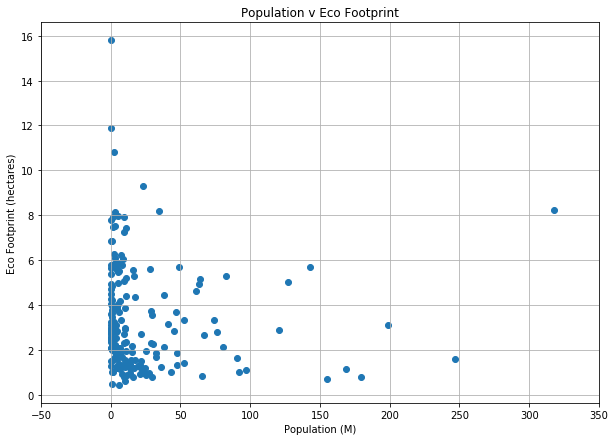

Note: Two countries with outlier populations (> 350M), China and India, were not included on this graph. However their data is in the dataframe below.


In [5]:
# Data lists
population = eco_sort['Population (millions)']
deficit_reserve = eco_sort['Total Ecological Footprint']

# Scatter plot
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(population, deficit_reserve)
plt.xlim(-50,350,50)
plt.title('Population v Eco Footprint')
plt.xlabel('Population (M)')
plt.ylabel('Eco Footprint (hectares)')
plt.grid()
plt.show()

# Country Population v Biocapacity Deficit or Reserve
# population = eco_sort['Population (millions)']
# deficit_reserve = eco_sort['Biocapacity Deficit or Reserve']
# fig, ax = plt.subplots(figsize=(10,7))
# plt.scatter(population, deficit_reserve)
# plt.xlim(-50,350,50)
# plt.ylim(-20,30,10)
# plt.title('Population v Bio Deficit/Reserve')
# plt.xlabel('Population (M)')
# plt.ylabel('Bio Deficit/Reserve (hectares)')
# plt.grid()
# plt.show()
# print(" Three countries with outlier Bio Reserves (> 30 hectares) - French Guiana, and Suriname and Guyana (all in Latin America) - were also not included. Their data is included in the dataframe above. They have low populations of less than 1 million.")

print("Note: Two countries with outlier populations (> 350M), China and India, were not included on this graph. However their data is in the dataframe below.")


In [6]:
pop_sort = eco_sort.sort_values('Population (millions)', ascending=False)
pop_sort.head(3)

,Country,Region,Population (millions),Biocapacity Deficit or Reserve,Bio Deficit or Reserve %,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Footprint per Mil Persons,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity
148,China,Asia-Pacific,1408.04,-2.44,-259.6%,0.55,0.13,0.19,2.32,0.08,3.38,0.002400,0.46,0.10,0.22,0.04,0.12,0.94
92,India,Asia-Pacific,1236.69,-0.71,-157.8%,0.34,0.01,0.14,0.61,0.02,1.16,0.000938,0.35,0.00,0.02,0.03,0.05,0.45
170,United States of America,North America,317.50,-4.46,-118.6%,1.13,0.30,0.67,5.90,0.12,8.22,0.025890,1.49,0.28,1.57,0.33,0.09,3.76


# Global Region Totals

In [7]:
# New dataframe with Region Totals
region_sum = eco_sort.drop(columns=['Footprint per Mil Persons'])
region_sum = region_sum.groupby('Region').sum()

# Create row with Global Totals for later use
region_cols = region_sum.keys().tolist()
global_sum = []

for col in range(len(region_cols)):
    global_sum.append(region_sum.iloc[:,col].sum())

# Recalculate columns based on new data
new_col = region_sum['Biocapacity Deficit or Reserve']/region_sum['Total Biocapacity'] * 100
region_sum.insert(loc=2, column='Bio Deficit or Reserve %', value=new_col)
region_sum['Bio Deficit or Reserve %'] = region_sum['Bio Deficit or Reserve %'].map('{:.1f}%'.format)

new_col2 = region_sum['Total Ecological Footprint']/region_sum['Population (millions)']
region_sum.insert(loc=9, column='Footprint per Mil Persons', value=new_col2)

region_sum

,Population (millions),Biocapacity Deficit or Reserve,Bio Deficit or Reserve %,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Footprint per Mil Persons,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity
Region,,,,,,,,,,,,,,,,
Africa,1034.640,30.78,26.2%,19.48,11.48,15.50,29.04,4.69,86.89,0.083981,15.20,29.78,51.11,18.19,1.98,117.66
Asia-Pacific,3880.170,-4.72,-5.1%,17.96,7.97,11.22,45.42,6.97,98.02,0.025262,16.51,18.07,35.48,18.09,2.29,93.29
European Union,503.980,-47.50,-50.1%,23.59,6.25,15.40,78.34,2.78,142.36,0.282472,25.96,2.92,29.36,9.39,3.25,94.87
Latin America,605.410,237.14,63.6%,14.85,12.57,11.91,56.41,4.37,135.87,0.224426,15.26,19.18,282.18,46.42,1.80,372.98
Middle East/Central Asia,405.586,-70.87,-316.2%,13.77,4.87,3.70,67.82,1.48,93.25,0.229914,6.92,6.52,2.28,5.09,1.58,22.41
North America,352.400,-2.27,-11.4%,2.59,0.63,1.87,10.90,0.24,22.16,0.062883,4.60,0.57,10.69,3.74,0.16,19.90
Northern/Eastern Europe,238.180,-10.57,-30.6%,7.79,1.76,5.07,24.32,0.66,45.16,0.189605,7.56,1.95,14.34,2.04,0.55,34.59


In [8]:
# New dataframe with Global Totals
global_totals = pd.DataFrame([global_sum], columns=region_cols)
global_totals.rename(index = {0: "Global Totals"}, inplace=True)

# Recalculate last columns based on new data
new_col = global_totals['Biocapacity Deficit or Reserve']/global_totals['Total Biocapacity'] * 100
global_totals.insert(loc=2, column='Bio Deficit or Reserve %', value=new_col)
global_totals['Bio Deficit or Reserve %'] = global_totals['Bio Deficit or Reserve %'].map('{:.1f}%'.format)

new_col2 = global_totals['Total Ecological Footprint']/global_totals['Population (millions)']
global_totals.insert(loc=9, column='Footprint per Mil Persons', value=new_col2)

global_totals

# # New dataframe with Global Totals
# global_totals = region_sum
# global_percent = "{:.1%}".format(global_sum[1]/global_sum[13])   # make sure these values are still correct if Region Dataframe ever changes
# global_sum.insert(2, global_percent)
# global_totals.loc['Global Totals'] = global_sum
# global_totals

,Population (millions),Biocapacity Deficit or Reserve,Bio Deficit or Reserve %,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Footprint per Mil Persons,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity
Global Totals,7020.366,131.99,17.5%,100.03,45.53,64.67,312.25,21.19,623.71,0.088843,92.01,78.99,425.44,102.96,11.61,755.7


# Global Region Biocapacities

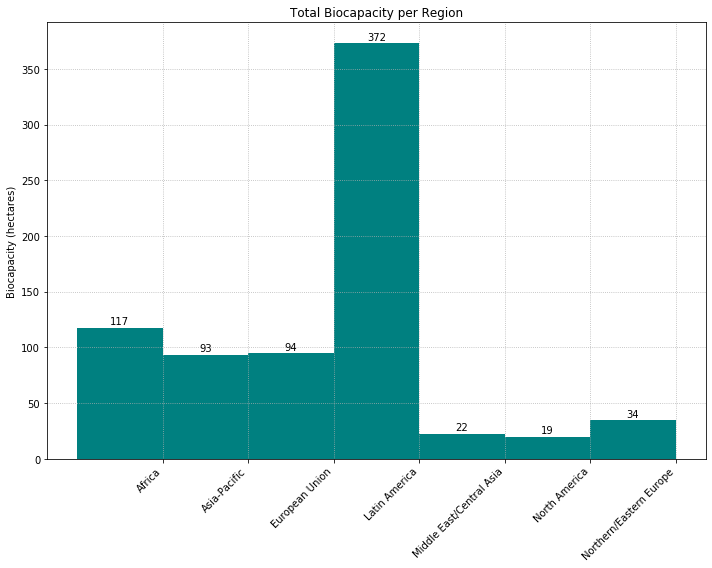

In [27]:
# Data lists
region_list = region_sum.index.tolist()
total_capacity = region_sum['Total Biocapacity'].tolist()

# Set up axes and labels
fig, ax = plt.subplots(figsize=(10,8))
x_ticks = np.arange(len(region_list))
ax.set_xticks(x_ticks)
ax.set_xticklabels(region_list, rotation=45, horizontalalignment='right')
plt.grid(linestyle='dotted')

plt.title('Total Biocapacity per Region')
plt.ylabel('Biocapacity (hectares)')

# Function to label the bars
def autolabel(rects):
    for rect in rects:
        bar_height = rect.get_height()
        label_va = bar_height + 3

        ax.text(rect.get_x() + rect.get_width()/2, label_va,
            str(int(bar_height)), ha='center')
        
# Plot the chart
bar_format = ax.bar(x_ticks - 0.5, total_capacity, width=1.0, color='teal')

# Call function to label the bars
autolabel(bar_format)

# Save and show the figure
plt.tight_layout()
# plt.savefig('Images/bio-capacity.png')
plt.show()


# Global Region Footprints

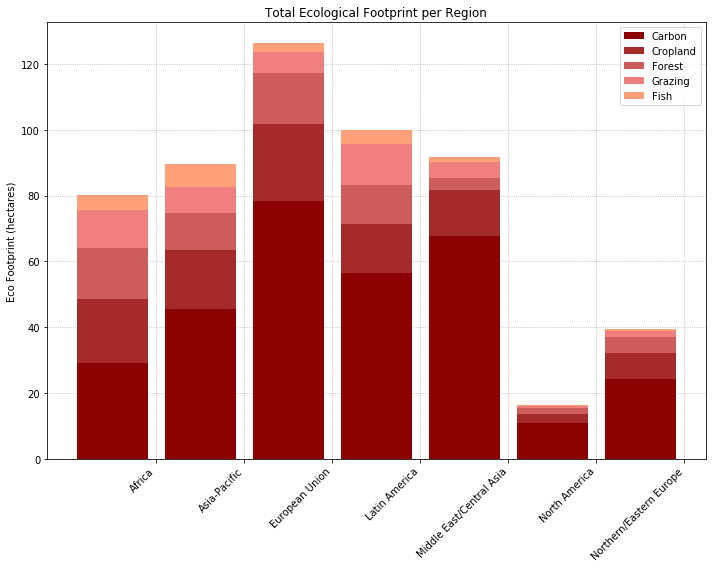

In [26]:
# Data lists
carbon_foot = region_sum['Carbon Footprint']
crop_foot = region_sum['Cropland Footprint']
forest_foot = region_sum['Forest Footprint']
grazing_foot = region_sum['Grazing Footprint']
fish_foot = region_sum['Fish Footprint']

# Set up axes and labels
fig, ax = plt.subplots(figsize=(10,8))
x_ticks = np.arange(len(region_list))
ax.set_xticks(x_ticks)
ax.set_xticklabels(region_list, rotation=45, horizontalalignment='right')
plt.grid(linestyle='dotted', zorder=0)
plt.title('Total Ecological Footprint per Region')
plt.ylabel('Eco Footprint (hectares)')

# Calculate the bottoms of each stacked bar
crop_bottom = carbon_foot
forest_bottom = np.add(carbon_foot, crop_foot)
grazing_bottom = np.add(forest_bottom, forest_foot)
fish_bottom = np.add(grazing_bottom, grazing_foot)

# Plot the stacked bar chart
carbon_bar = plt.bar(x_ticks-0.5, carbon_foot, width=0.8, color='darkred', zorder=2)
crop_bar = plt.bar(x_ticks-0.5, crop_foot, width=0.8, bottom=crop_bottom, color='brown', zorder=2)
forest_bar = plt.bar(x_ticks-0.5, forest_foot, width=0.8, bottom=forest_bottom, color='indianred', zorder=2)
grazing_bar = plt.bar(x_ticks-0.5, grazing_foot, width=0.8, bottom=grazing_bottom, color='lightcoral', zorder=2)
fish_bar = plt.bar(x_ticks-0.5, fish_foot, width=0.8, bottom=fish_bottom, color='lightsalmon', zorder=2)

plt.legend((carbon_bar, crop_bar, forest_bar, grazing_bar, fish_bar), ('Carbon', 'Cropland', 'Forest', 'Grazing', 'Fish'))

# Save and show the figure
plt.tight_layout()
# plt.savefig('Images/total_footprint.png')
plt.show()


In [12]:
# print("North America has an overall low footprint but that's because Canada's Reserve compensates for the U.S.'s Deficit.")
# na_countries = eco_sort.loc[eco_sort["Region"] == "North America",:]
# na_countries

# Global Region Bio Reserve or Deficit

In [13]:
# New dataframe with Bio Deficits or Reserves only
region_landuse = pd.DataFrame({
    'Population (millions)' : region_sum['Population (millions)'],
    'Total Biocapacity' : region_sum['Total Biocapacity'],
    'Cropland Deficit or Reserve' : region_sum['Cropland'] - region_sum['Cropland Footprint'],
    'Grazing Deficit or Reserve' : region_sum['Grazing Land'] - region_sum['Grazing Footprint'],
    'Forest Deficit or Reserve' : region_sum['Forest Land'] - region_sum['Forest Footprint'],
    'Fish Deficit or Reserve' : region_sum['Fishing Water'] - region_sum['Fish Footprint'],
    'Carbon Deficit or Reserve' : region_sum['Urban Land'] - region_sum['Carbon Footprint'],
    'Total Bio Deficit or Reserve' : region_sum['Biocapacity Deficit or Reserve'],
    'Bio Deficit or Reserve %' : region_sum['Bio Deficit or Reserve %'],
})

# Conditional color formatting
def highlight_pos(value):
    is_pos = value >= 0
    return ['background-color: teal' if v else 'background-color: lightcoral' for v in is_pos]

df_slice = pd.IndexSlice[:, 'Cropland Deficit or Reserve':'Total Bio Deficit or Reserve']
region_landuse.style.apply(highlight_pos, subset = df_slice)


,Population (millions),Total Biocapacity,Cropland Deficit or Reserve,Grazing Deficit or Reserve,Forest Deficit or Reserve,Fish Deficit or Reserve,Carbon Deficit or Reserve,Total Bio Deficit or Reserve,Bio Deficit or Reserve %
Region,,,,,,,,,
Africa,1034.64,117.66,-4.28,18.3,35.61,13.5,-27.06,30.78,26.2%
Asia-Pacific,3880.17,93.29,-1.45,10.1,24.26,11.12,-43.13,-4.72,-5.1%
European Union,503.98,94.87,2.37,-3.33,13.96,6.61,-75.09,-47.5,-50.1%
Latin America,605.41,372.98,0.41,6.61,270.27,42.05,-54.61,237.14,63.6%
Middle East/Central Asia,405.586,22.41,-6.85,1.65,-1.42,3.61,-66.24,-70.87,-316.2%
North America,352.4,19.9,2.01,-0.06,8.82,3.5,-10.74,-2.27,-11.4%
Northern/Eastern Europe,238.18,34.59,-0.23,0.19,9.27,1.38,-23.77,-10.57,-30.6%


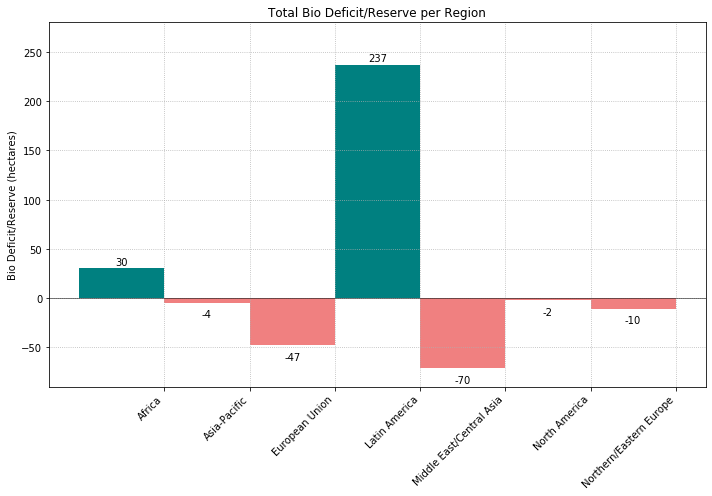

In [25]:
# Data lists
region_list = region_landuse.index.tolist()
total_deficit = region_landuse['Total Bio Deficit or Reserve'].tolist()

# Set up axes  and labels
fig, ax = plt.subplots(figsize=(10,7))
x_ticks = np.arange(len(region_list))
ax.set_xticks(x_ticks)
ax.set_xticklabels(region_list, rotation=45, horizontalalignment='right')
plt.ylim(-90,280,50)
plt.grid(linestyle='dotted')
plt.axhline(linewidth=0.5, color='black')

plt.title('Total Bio Deficit/Reserve per Region')
plt.ylabel('Bio Deficit/Reserve (hectares)')

# Function to label the bars
def autolabel(rects):
    for rect in rects:
        bar_height = rect.get_height()
        
        # Formatting if bar is negative or positive
        if bar_height >= 0:
            label_va = bar_height + 3
        else:
            label_va = bar_height - 15

        ax.text(rect.get_x() + rect.get_width()/2, label_va,
            str(int(bar_height)), ha='center')

# Color the bars        
bar_color = []
for change in total_deficit:
    if change <= 0:
        bar_color.append('lightcoral')
    else:
        bar_color.append('teal')
        
# Plot the chart
bar_format = ax.bar(x_ticks - 0.5, total_deficit, width=1.0, color=bar_color)

# Call function to label the bars
autolabel(bar_format)

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/bio-deficit-reserve.png')
plt.show()


# Initial Observations
1. Most countries actually have a Bio Reserve from many of land types but a Total Bio Deficit because their Carbon Footprint and thus Carbon Deficit is high. Carbon Footprint primarily comes from Urban Land. Urban Land consumes a lot resources and produces a lot of waste. The other Land Types produce a lot of resources while producing little waste, even absorbing some waste.
<br>**Note:** These charts do not necessarily indicate the "trade" between land types or countries. For example, Urban Land has a Bio Deficit but it is able to maintain because it is likely pulling resources from a land type with a Bio Reserve. The same concept goes for countries with a Bio Deficit pulling resources from countries with a Bio Reserve.<br><br>

2. Latin America and Africa have a Bio Reserve meaning they are using their ecological resources under capacity. This may have to do with having relatively high Biocapacity to begin with.<br><br>

3. Regions that have low capacity now may be due to several previous years of Bio Deficit which can drain a region's resources. Many of them include "developed" countries while the regions with high Biocapacity (for now) are actually "underdeveloped" countries. It would be interesting to see several years of data to understand if there is a trend of the status of developing countries (HDI & GDP) and the rate of change in their footprint and/or Biocapacity Reserve.

**Note:** Total Deficit or Reserve may include some Land Types in its calculation that are not explicitly listed in the original data set.
